<a href="https://www.kaggle.com/code/soumikniloy/a-multivariate-time-series-analysis-of-maang?scriptVersionId=156353682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the datasets
companies = ['Amazon', 'Apple', 'Google', 'Microsoft', 'Netflix']
dfs = {company: pd.read_csv(f'/kaggle/input/stock/{company}.csv') for company in companies}

In [3]:
# Hyperparameters
sequence_length = 30
num_epochs = 50
batch_size = 64

In [4]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

Epoch 1/50
73/73 [==============================] - 13s 96ms/step - loss: 0.0018 - val_loss: 0.0317
Epoch 2/50
73/73 [==============================] - 6s 89ms/step - loss: 2.4234e-05 - val_loss: 0.0121
Epoch 3/50
73/73 [==============================] - 7s 92ms/step - loss: 2.2525e-05 - val_loss: 0.0050
Epoch 4/50
73/73 [==============================] - 6s 89ms/step - loss: 2.4089e-05 - val_loss: 0.0079
Epoch 5/50
73/73 [==============================] - 6s 88ms/step - loss: 2.1771e-05 - val_loss: 0.0030
Epoch 6/50
73/73 [==============================] - 6s 88ms/step - loss: 1.8823e-05 - val_loss: 0.0033
Epoch 7/50
73/73 [==============================] - 6s 89ms/step - loss: 1.8772e-05 - val_loss: 0.0019
Epoch 8/50
73/73 [==============================] - 7s 91ms/step - loss: 1.8108e-05 - val_loss: 0.0022
Epoch 9/50
73/73 [==============================] - 7s 90ms/step - loss: 1.8140e-05 - val_loss: 0.0010
Epoch 10/50
73/73 [==============================] - 6s 89ms/step - loss: 1.

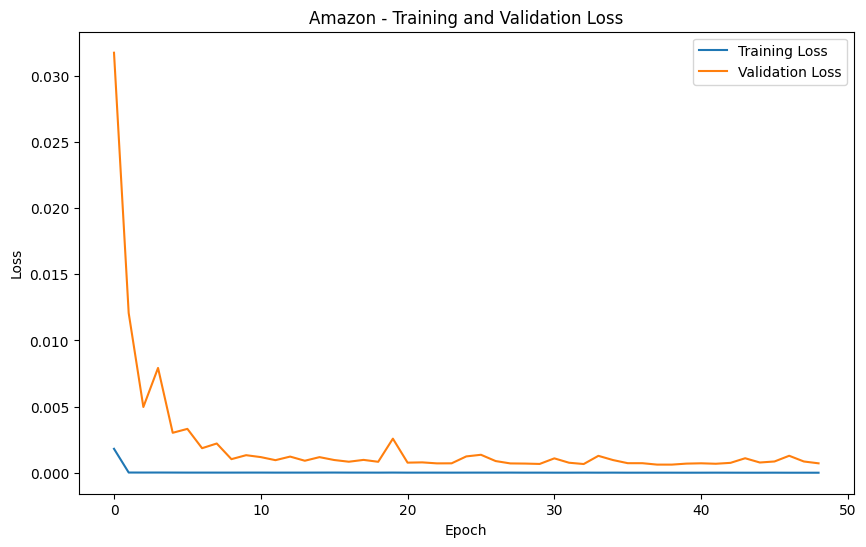

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

Epoch 1/50
73/73 [==============================] - 10s 96ms/step - loss: 7.2583e-04 - val_loss: 0.0358
Epoch 2/50
73/73 [==============================] - 7s 89ms/step - loss: 1.2176e-05 - val_loss: 0.0248
Epoch 3/50
73/73 [==============================] - 6s 89ms/step - loss: 1.2053e-05 - val_loss: 0.0182
Epoch 4/50
73/73 [==============================] - 7s 90ms/step - loss: 1.1521e-05 - val_loss: 0.0150
Epoch 5/50
73/73 [==============================] - 7s 90ms/step - loss: 1.1825e-05 - val_loss: 0.0108
Epoch 6/50
73/73 [==============================] - 7s 93ms/step - loss: 1.2029e-05 - val_loss: 0.0085
Epoch 7/50
73/73 [==============================] - 7s 91ms/step - loss: 1.2921e-05 - val_loss: 0.0062
Epoch 8/50
73/73 [==============================] - 6s 88ms/step - loss: 1.1587e-05 - val_loss: 0.0044
Epoch 9/50
73/73 [==============================] - 7s 90ms/step - loss: 1.1963e-05 - val_loss: 0.0040
Epoch 10/50
73/73 [==============================] - 6s 89ms/step - loss

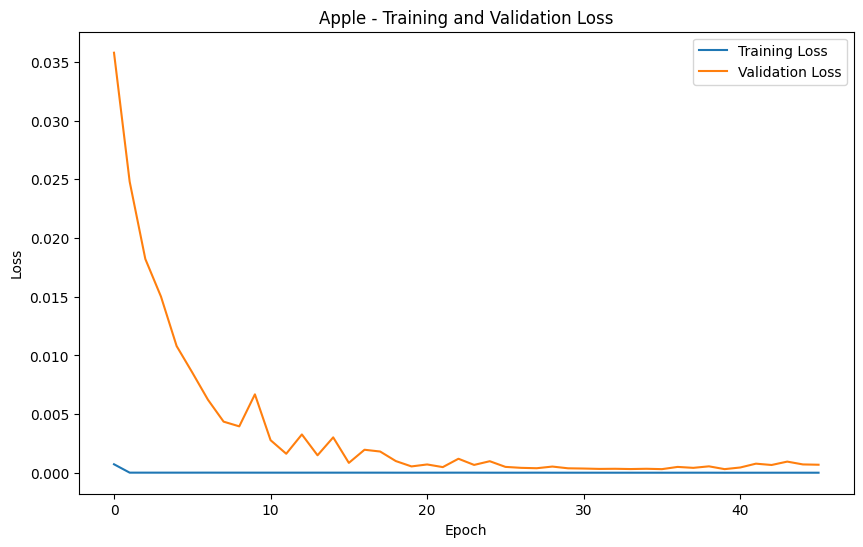

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

Epoch 1/50
59/59 [==============================] - 9s 94ms/step - loss: 0.0053 - val_loss: 0.3287
Epoch 2/50
59/59 [==============================] - 5s 86ms/step - loss: 5.6057e-05 - val_loss: 0.0381
Epoch 3/50
59/59 [==============================] - 5s 86ms/step - loss: 4.1484e-05 - val_loss: 0.0172
Epoch 4/50
59/59 [==============================] - 5s 91ms/step - loss: 4.1062e-05 - val_loss: 0.0166
Epoch 5/50
59/59 [==============================] - 5s 86ms/step - loss: 3.8216e-05 - val_loss: 0.0103
Epoch 6/50
59/59 [==============================] - 5s 87ms/step - loss: 3.7790e-05 - val_loss: 0.0069
Epoch 7/50
59/59 [==============================] - 5s 89ms/step - loss: 3.7381e-05 - val_loss: 0.0038
Epoch 8/50
59/59 [==============================] - 5s 86ms/step - loss: 3.7782e-05 - val_loss: 0.0016
Epoch 9/50
59/59 [==============================] - 5s 86ms/step - loss: 3.8171e-05 - val_loss: 0.0013
Epoch 10/50
59/59 [==============================] - 5s 89ms/step - loss: 3.8

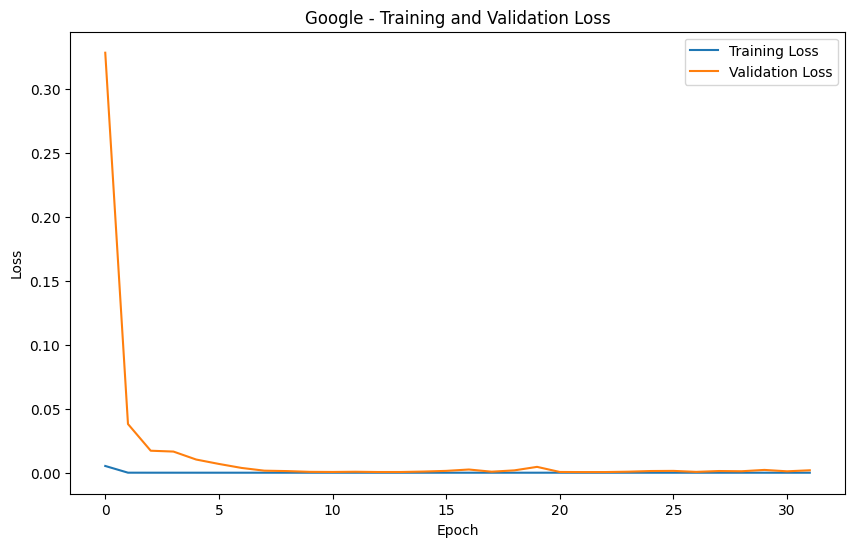

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

Epoch 1/50
73/73 [==============================] - 10s 97ms/step - loss: 6.1020e-04 - val_loss: 0.3298
Epoch 2/50
73/73 [==============================] - 7s 90ms/step - loss: 2.1677e-05 - val_loss: 0.1162
Epoch 3/50
73/73 [==============================] - 6s 89ms/step - loss: 2.0260e-05 - val_loss: 0.0728
Epoch 4/50
73/73 [==============================] - 7s 90ms/step - loss: 1.9709e-05 - val_loss: 0.0514
Epoch 5/50
73/73 [==============================] - 7s 91ms/step - loss: 1.8641e-05 - val_loss: 0.0445
Epoch 6/50
73/73 [==============================] - 7s 92ms/step - loss: 1.7366e-05 - val_loss: 0.0377
Epoch 7/50
73/73 [==============================] - 7s 91ms/step - loss: 1.6696e-05 - val_loss: 0.0280
Epoch 8/50
73/73 [==============================] - 7s 89ms/step - loss: 1.5168e-05 - val_loss: 0.0204
Epoch 9/50
73/73 [==============================] - 7s 89ms/step - loss: 1.5121e-05 - val_loss: 0.0175
Epoch 10/50
73/73 [==============================] - 7s 92ms/step - loss

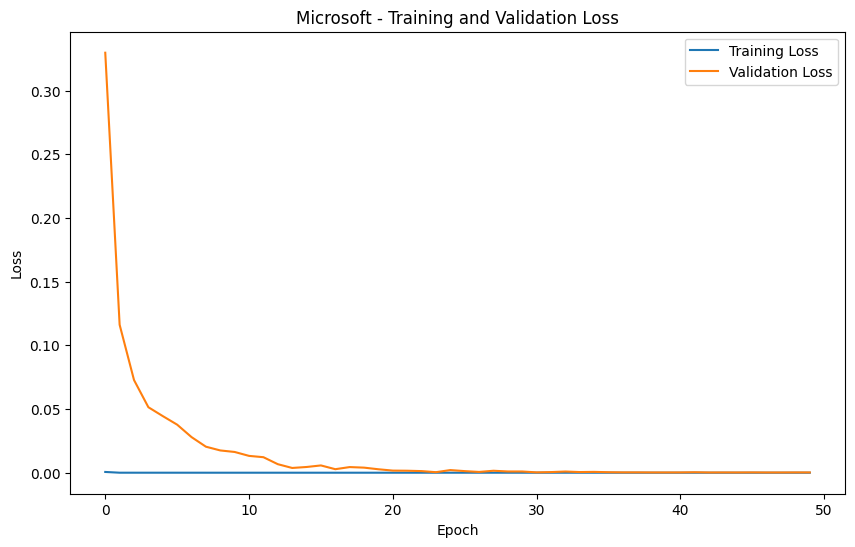

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

Epoch 1/50
66/66 [==============================] - 9s 92ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 2/50
66/66 [==============================] - 6s 87ms/step - loss: 1.3499e-04 - val_loss: 0.0025
Epoch 3/50
66/66 [==============================] - 6s 85ms/step - loss: 9.1061e-05 - val_loss: 0.0022
Epoch 4/50
66/66 [==============================] - 6s 90ms/step - loss: 9.6451e-05 - val_loss: 0.0028
Epoch 5/50
66/66 [==============================] - 6s 91ms/step - loss: 8.4081e-05 - val_loss: 0.0029
Epoch 6/50
66/66 [==============================] - 6s 87ms/step - loss: 7.6903e-05 - val_loss: 0.0052
Epoch 7/50
66/66 [==============================] - 6s 87ms/step - loss: 8.0007e-05 - val_loss: 0.0101
Epoch 8/50
66/66 [==============================] - 6s 87ms/step - loss: 8.5143e-05 - val_loss: 0.0066
Epoch 9/50
66/66 [==============================] - 6s 90ms/step - loss: 8.1239e-05 - val_loss: 0.0040
Epoch 10/50
66/66 [==============================] - 6s 86ms/step - loss: 7.5

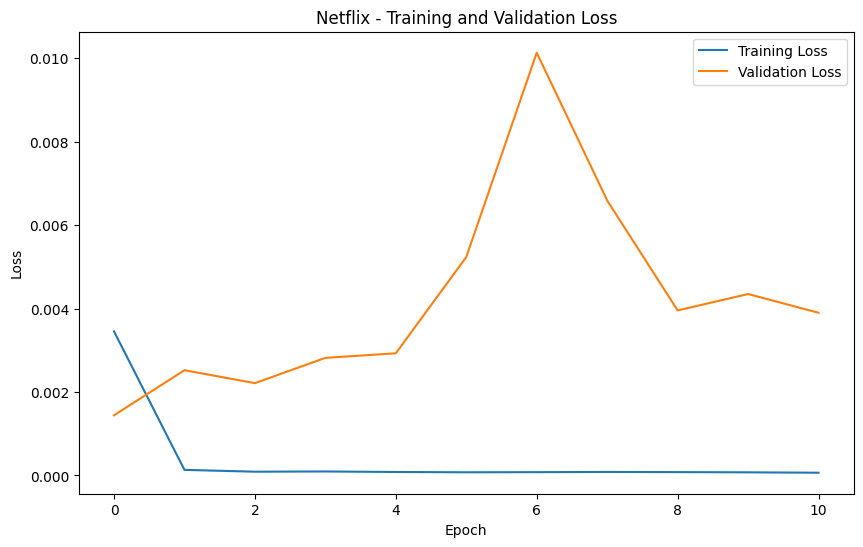

In [5]:
# Create and train a unique model for each company
models = {}
histories = {}
for company in companies:
    df = dfs[company]
    
    # Prepare the data
    scaler = MinMaxScaler()
    data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
    data = data[:, :5]
    
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length][3])  # Using 'Close' as the target variable
    
    X = np.array(X)
    y = np.array(y)
    
    # Train-test split
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Create the model
    model = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length, 5)),
        LSTM(64, activation='relu', return_sequences=False),
        Dense(1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])
    # Store the model and history
    models[company] = model
    histories[company] = history
    
    # Save the model
    models[company] = model
    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{company} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

1/1 [==============================] - 0s 292ms/step


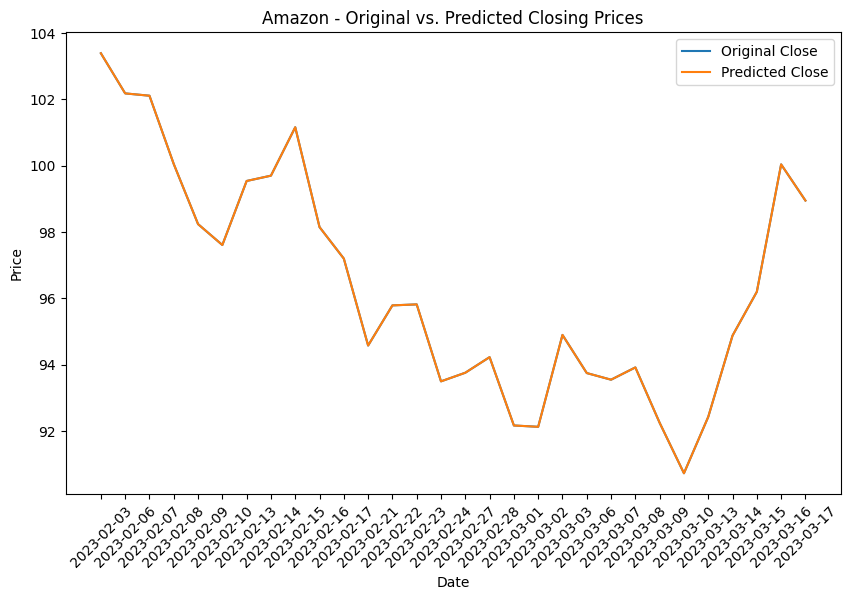

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

Evaluation metrics for Amazon:

Mean Squared Error: 7.404774363674564e-29
Mean Absolute Error: 5.210646728907401e-15
R-squared: 1.0


1/1 [==============================] - 0s 260ms/step


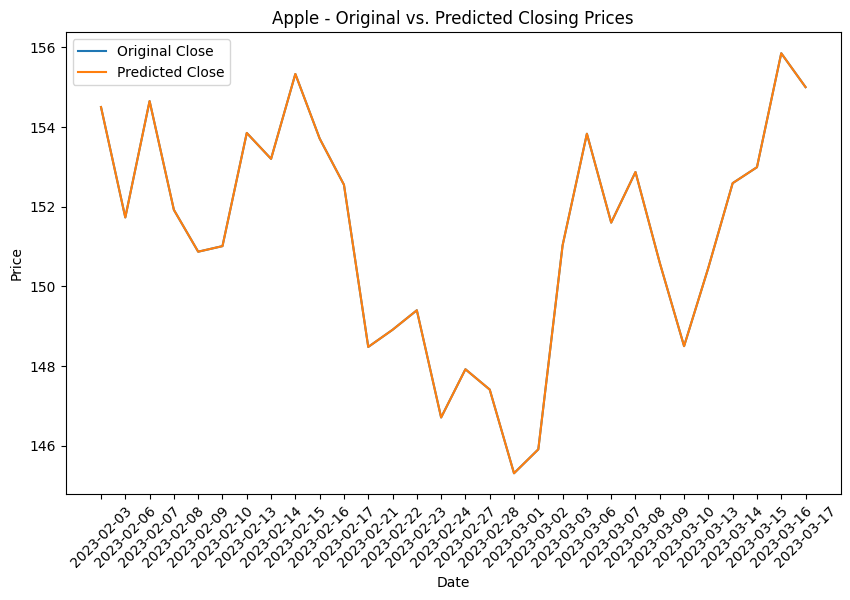

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

Evaluation metrics for Apple:

Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared: 1.0


1/1 [==============================] - 0s 263ms/step


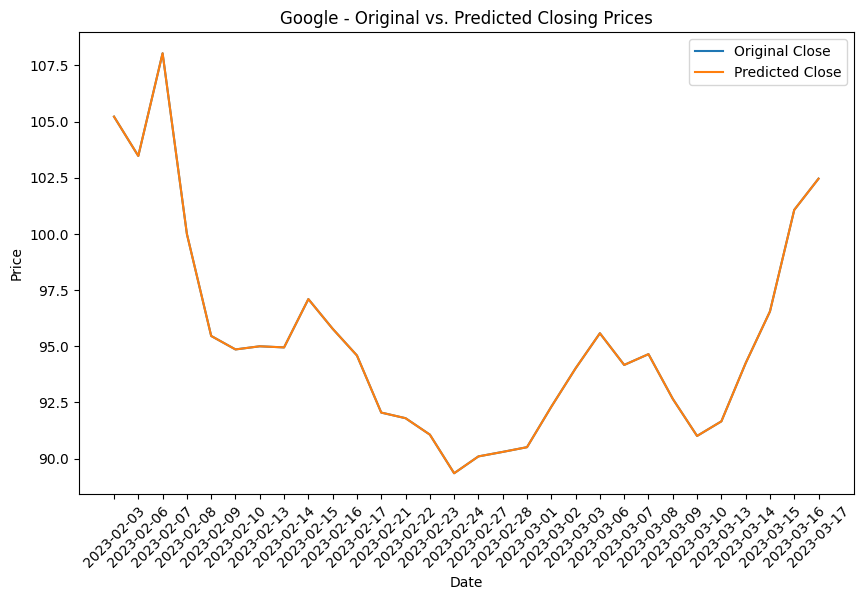

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

Evaluation metrics for Google:

Mean Squared Error: 2.0194839173657903e-29
Mean Absolute Error: 1.4210854715202005e-15
R-squared: 1.0


1/1 [==============================] - 0s 261ms/step


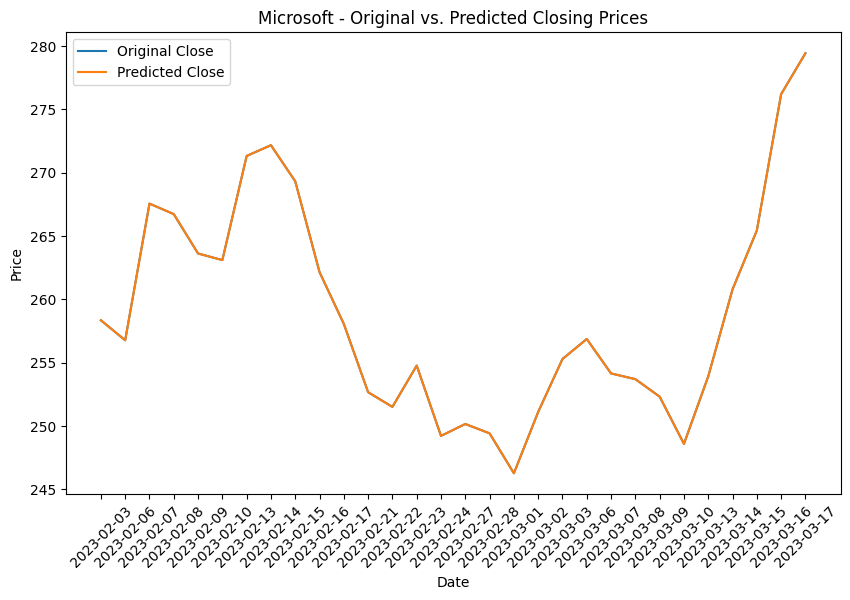

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

Evaluation metrics for Microsoft:

Mean Squared Error: 8.077935669463161e-29
Mean Absolute Error: 2.842170943040401e-15
R-squared: 1.0


1/1 [==============================] - 0s 260ms/step


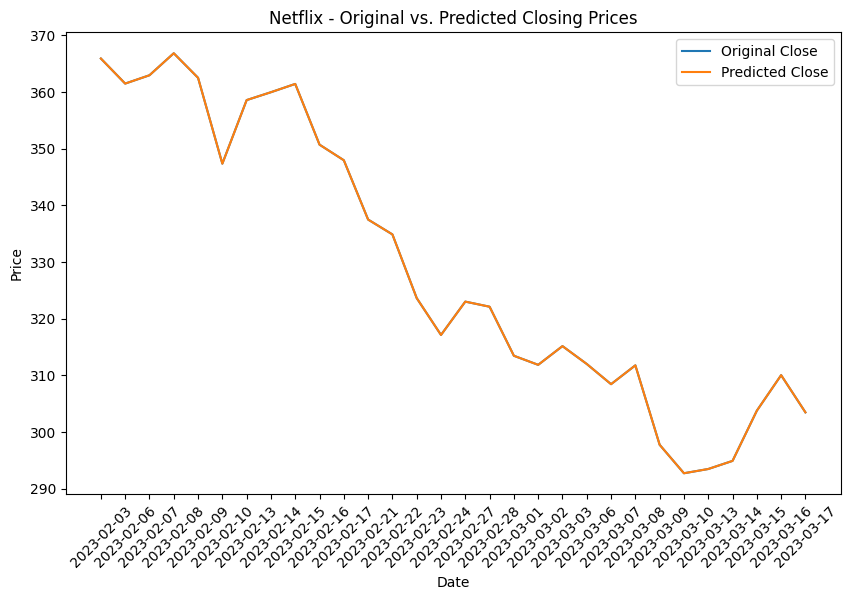

Evaluation metrics for Netflix:

Mean Squared Error: 2.1541161785235095e-28
Mean Absolute Error: 3.789561257387201e-15
R-squared: 1.0




/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [7]:
# Evaluate each model and plot original vs. predicted prices
for company in companies:
    model = models[company]
    df = dfs[company]
    
    # Prepare input data for prediction
    selected_scaler = MinMaxScaler()
    selected_data = selected_scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
    selected_data = selected_data[:, :5]
    
    X_pred = []
    for i in range(len(selected_data) - sequence_length, len(selected_data)):
        X_pred.append(selected_data[i-sequence_length:i])
    X_pred = np.array(X_pred)
    
    # Make predictions
    predicted_normalized = model.predict(X_pred)
    
    # Concatenate original scaled data and predicted normalized values
    concatenated_data = np.concatenate((selected_data[-len(X_pred):], predicted_normalized), axis=1)
    
    # Inverse scale the concatenated data
    predicted_prices = selected_scaler.inverse_transform(concatenated_data)[:, 3]
    
    # Plot original and predicted prices
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'][-len(X_pred):], df['Close'][-len(X_pred):], label='Original Close')
    plt.plot(df['Date'][-len(X_pred):], predicted_prices, label='Predicted Close')
    plt.title(f'{company} - Original vs. Predicted Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    
    # Evaluate using regression metrics
    y_true = df['Close'][-len(X_pred):]
    mse = mean_squared_error(y_true, predicted_prices)
    mae = mean_absolute_error(y_true, predicted_prices)
    r2 = r2_score(y_true, predicted_prices)
    
    print(f"Evaluation metrics for {company}:\n")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("\n")